# IMPORTANT LIBRARIES

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

* Read Dataset 

In [2]:
df=pd.read_csv('./SalesStore.csv')
df.head()

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH


In [3]:
df.shape

(216, 12)

In [4]:
df=df.drop(columns=['Postal_Code','Product_Reference','State'],axis=1)

In [6]:
df.isna().sum()

Order_Date       0
Ship_Date        0
Ship_Mode        0
Region           0
Category         0
Sub_Category     0
Sales            0
Quantity         0
Profit           0
Prodcut_Price    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_Date     216 non-null    object 
 1   Ship_Date      216 non-null    object 
 2   Ship_Mode      216 non-null    object 
 3   Region         216 non-null    object 
 4   Category       216 non-null    object 
 5   Sub_Category   216 non-null    object 
 6   Sales          216 non-null    int64  
 7   Quantity       216 non-null    int64  
 8   Profit         216 non-null    float64
 9   Prodcut_Price  216 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 17.0+ KB


In [170]:
df.describe()

,Sales,Quantity,Profit,Prodcut_Price
count,216.000000,216.000000,216.000000,216.000000
mean,290.879630,2.393519,5.843287,285.036343
std,258.750781,1.085959,5.148745,253.602490
min,5.000000,1.000000,0.150000,4.850000
25%,50.000000,1.000000,1.000000,49.000000
50%,200.000000,2.000000,4.000000,196.000000
75%,450.000000,3.000000,9.000000,441.000000
max,900.000000,4.000000,18.000000,882.000000


In [171]:
df.describe(exclude=np.number)

,Order_Date,Ship_Date,Ship_Mode,Location,Category,Products
count,216,216,216,216,216,216
unique,41,41,2,4,3,32
top,2022-01-18,2022-01-25,Air,South,Office Supplies,Chairs
freq,6,6,110,76,73,13


# Explore Data And Analysis it

In [9]:
df=df.rename(columns={'Sub_Category':'Products','Region':'Location'})

In [ ]:
df['Prodcut_Price']=df.Sales-df.Profit

In [169]:
df.Category.value_counts()

Office Supplies    73
Electronics        72
Furniture          71
Name: Category, dtype: int64

In [12]:
df.Products.unique()


array(['Tape', 'Phones', 'Chairs', 'Sofas', 'Paper', 'Tablets',
       'Speakers', 'Markers', 'Laptops', 'Erasers', 'Beds', 'Pens',
       'Desks', 'Monitors', 'Tables', 'Smartphones', 'Envelopes',
       'Headphones', 'Pencils', 'Storage', 'Notebooks', 'Cameras',
       'Bookcases', 'Glue', 'Smartwatches', 'Outdoor Furniture',
       'Staplers', 'Accessories', 'Rulers', 'Printers', 'Lighting',
       'Scissors'], dtype=object)

Text(0.5, 1.0, 'best 5 Products Deliverd Air')

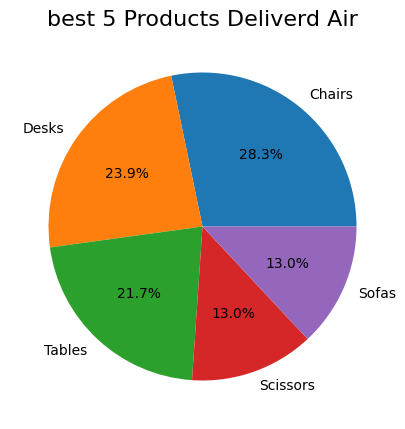

In [20]:
label=["Chairs","Desks","Tables","Scissors" ,"Sofas"]
bar, ax = plt.subplots(figsize = (5,5))
plt.pie(df['Products'][(df.Ship_Mode=='Air')].value_counts()[:5],labels=label,autopct="%.1f%%")
plt.title('best 5 Products Deliverd Air', size=16)

Text(0.5, 1.0, 'best 5 Products Deliverd Ground')

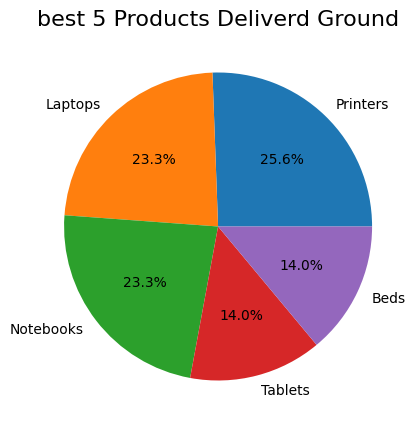

In [21]:
label=["Printers","Laptops","Notebooks","Tablets","Beds"]
bar, ax = plt.subplots(figsize = (5,5))
plt.pie(df['Products'][df.Ship_Mode=='Ground'].value_counts()[:5],labels=label,autopct="%.1f%%")
plt.title('best 5 Products Deliverd Ground', size=16)

In [25]:
df.Location.unique()

array(['Midwest', 'South', 'West', 'East'], dtype=object)

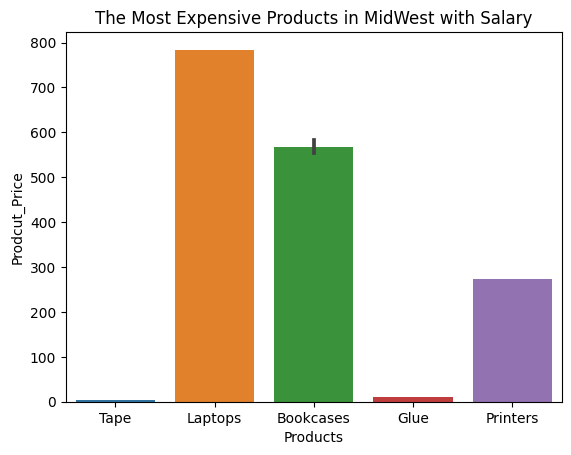

In [152]:
filtered_df = df[((df.Products=='Laptops') | (df.Products=='Bookcases') | (df.Products=='Printers') |
               (df.Products=='Tape') | (df.Products=='Glue')) &  (df.Location=='Midwest')]

x= filtered_df['Products']
y= filtered_df['Prodcut_Price']
sns.barplot(x=x,y=y)
plt.title('The Most Expensive Products in MidWest with Salary')
plt.show()

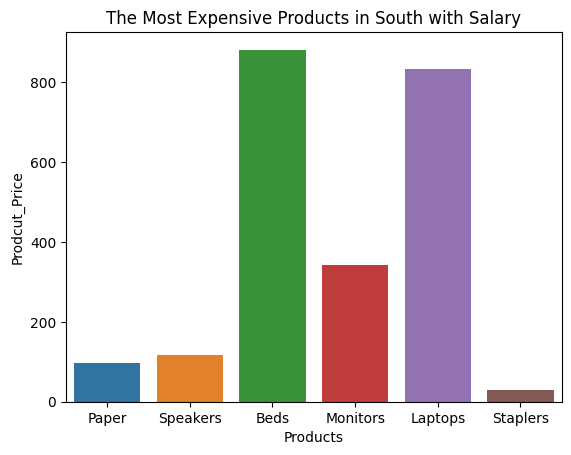

In [136]:
filtered_df = df[((df.Products=='Paper') | (df.Products=='Beds') | (df.Products=='Monitors') |
               (df.Products=='Staplers') | (df.Products=='Speakers')|(df.Products=='Laptops'))  & (df.Location=='South')]

x = filtered_df['Products']
y = filtered_df['Prodcut_Price']
sns.barplot(x=x, y=y)
plt.title('The Most Expensive Products in South with Salary')
plt.show()

In [68]:
df[['Category','Ship_Mode']].value_counts().sort_values(ascending=False)

Category         Ship_Mode
Furniture        Air          59
Electronics      Ground       51
Office Supplies  Ground       43
                 Air          30
Electronics      Air          21
Furniture        Ground       12
dtype: int64

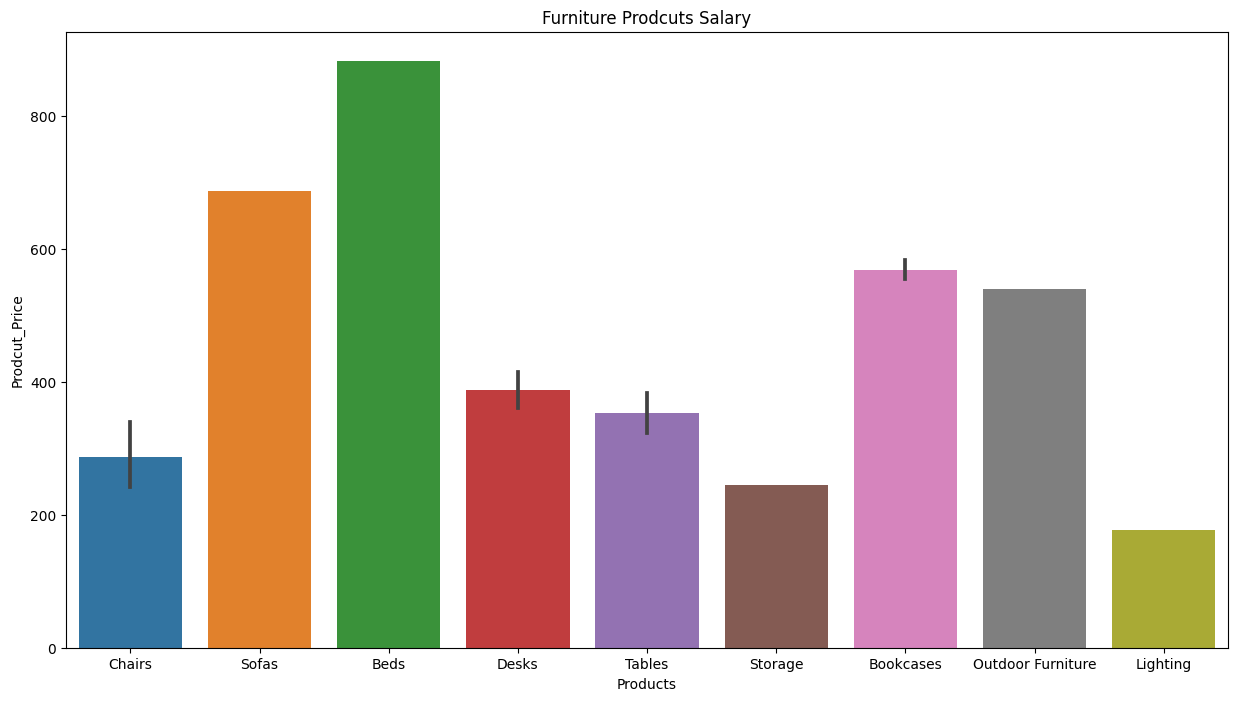

In [154]:
filter=df[df.Category=='Furniture']
y=filter.Prodcut_Price
x=filter.Products
plt.figure(figsize=(15,8))
sns.barplot(x=x, y=y)
plt.title('Furniture Prodcuts Salary')
plt.show()

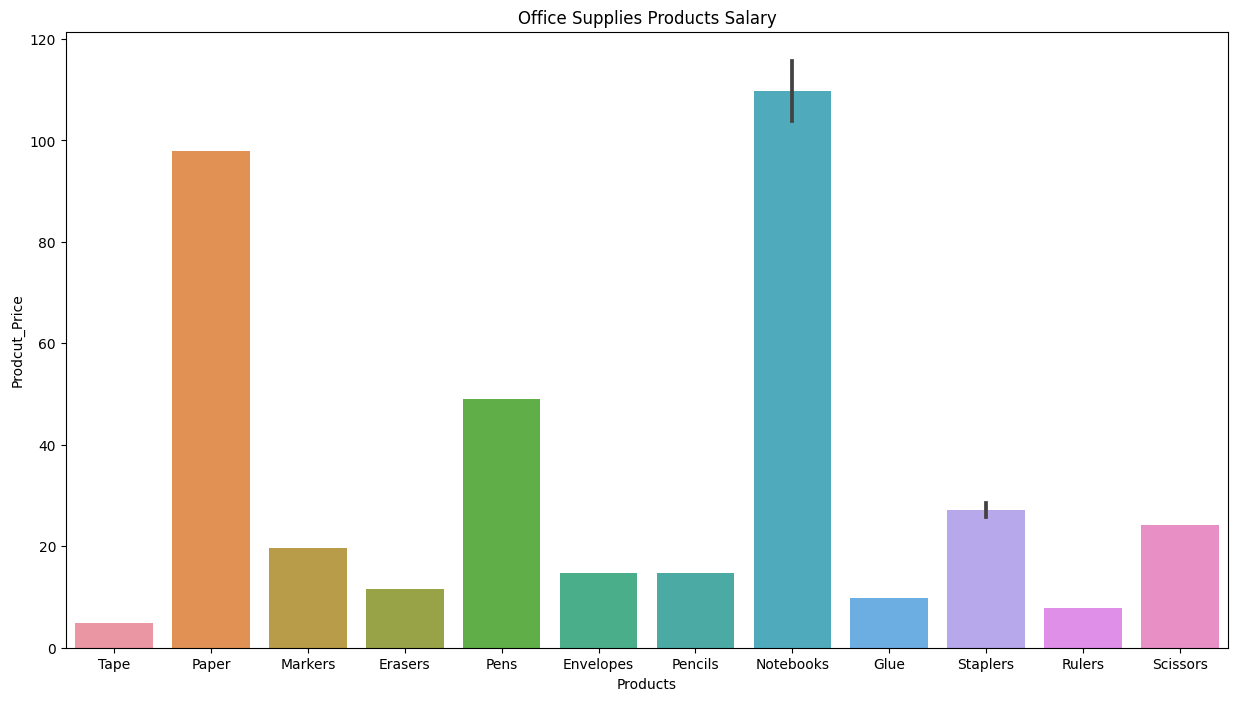

In [120]:
filter=df[df.Category=='Office Supplies']
x=filter.Prodcut_Price
y=filter.Products
plt.figure(figsize=(15,8))
sns.barplot(x=y, y=x)
plt.title('Office Supplies Products Salary')
plt.show()

In [125]:
df.Location[df.Ship_Mode=='Ground'].value_counts()

South      33
Midwest    28
East       24
West       21
Name: Location, dtype: int64

In [126]:
df.Location[df.Ship_Mode=='Air'].value_counts()

South      43
Midwest    33
West       28
East        6
Name: Location, dtype: int64

Text(0.5, 1.0, 'Places where products are most consumed')

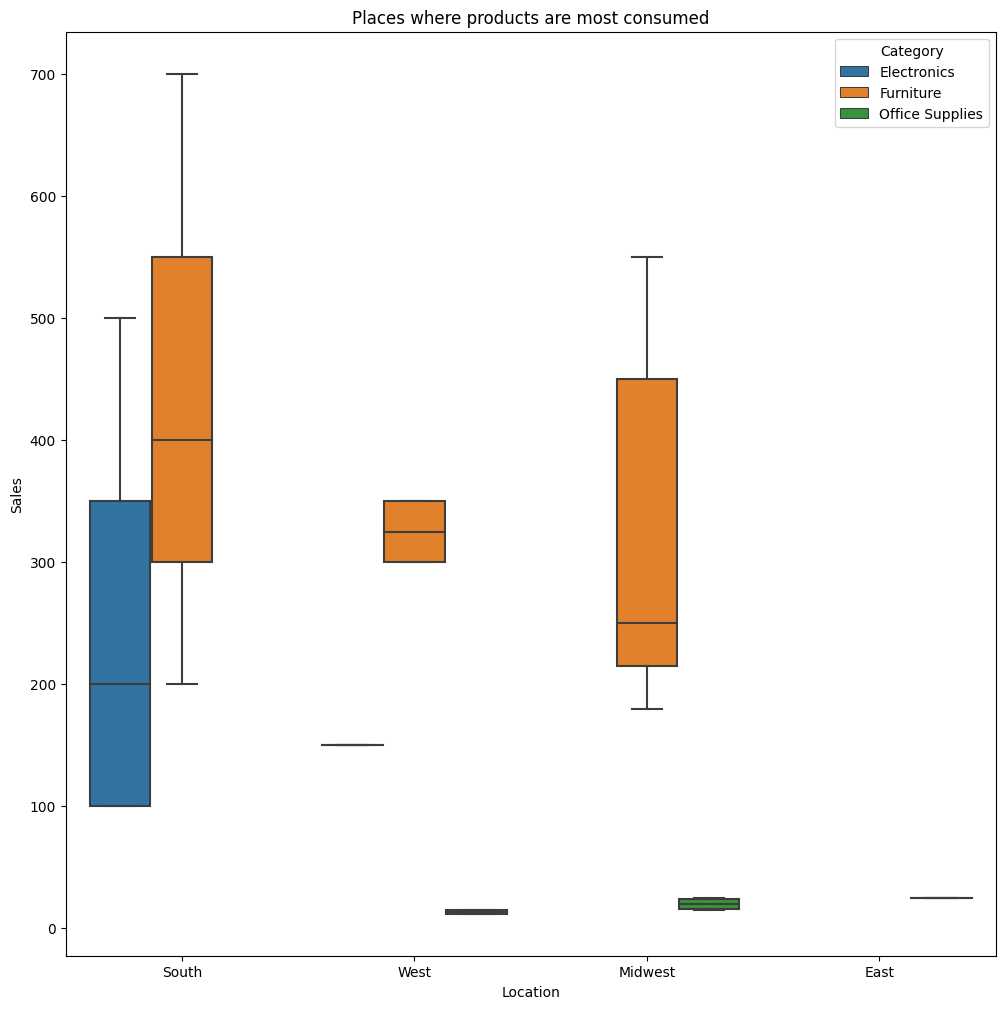

In [168]:
filter=df[(df.Ship_Mode=='Air')]
x=filter.Location
y=filter.Sales
plt.figure(figsize=(12,12))
sns.boxplot(x=x,y=y,hue=filter.Category)
plt.title('Places where products are most consumed')

In [208]:
df.Products[df.Location=='South'].mode()

0    Tables
Name: Products, dtype: object

<AxesSubplot: xlabel='Products', ylabel='Quantity'>

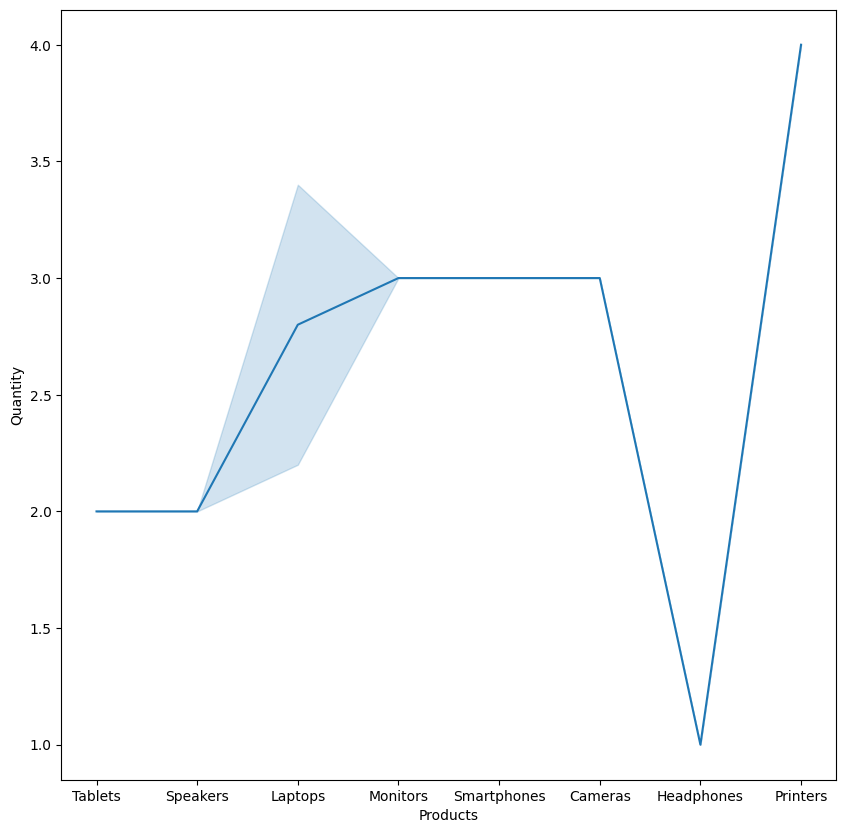

In [165]:
filter=df[(df.Category=='Electronics')&(df.Ship_Mode=='Ground')]
x=filter.Products
y=filter.Quantity
plt.figure(figsize=(10,10))
sns.lineplot(x=x, y=y)


* ALL ANALYSIS THAT I GET IT FROM THIS DATASET HOPE FOR YOU TO GIVE ME A FEEDBACK TO IMPROVE MY SKILLS aAND TAKE THE ADVICE INTO CONSIDRERATION